In [76]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [55]:
# Files to Load
city_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\city_data.csv"
ride_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


In [83]:
# Merge the two datasets 
combined_data_df = pd.merge(city_data_df, ride_data_df, on='city', how="left")
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [90]:
# Using .rename(columns={}) in order to rename columns
combined_data_df = combined_data_df.rename(columns={"type":"city_type"})
combined_data_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [91]:
# The total number of unique rides/cars
count_rides = combined_data_df["ride_id"].nunique()
count_rides

2375

In [92]:
# Using GroupBy in order to separate the data into fields according to "City" values
grouped_city_df = combined_data_df.groupby(['city','city_type','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_city_df)

# In order to be visualized, a data function must be used...
# grouped_city_df.count()

In [93]:
#Average fare per city
Average_fare_per_city = grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_city.head()

,,,fare
city,city_type,driver_count,
Amandaburgh,Urban,12,24.64
Barajasview,Urban,26,25.33
Barronchester,Suburban,11,36.42
Bethanyland,Suburban,22,32.96
Bradshawfurt,Rural,7,40.06


In [94]:
# Total No of Rides per city
rides_count_per_city = grouped_city_df[["ride_id"]].nunique()
rides_count_per_city.head()

,,,ride_id
city,city_type,driver_count,
Amandaburgh,Urban,12,18
Barajasview,Urban,26,22
Barronchester,Suburban,11,16
Bethanyland,Suburban,22,18
Bradshawfurt,Rural,7,10


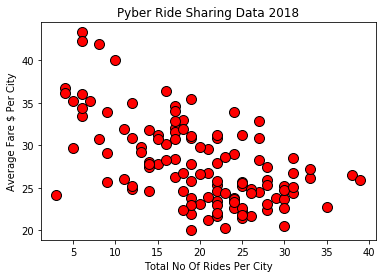

In [107]:

x = rides_count_per_city
y = Average_fare_per_city
# z = 'driver_count'
# p = 'city_type' 

plt.title('Pyber Ride Sharing Data 2018')
# plt.legend(handles=[p,z], loc="best")
# plt.legend(handles=['type'], loc="best")
# plt.legend()
# plt.show()
plt.ylabel('Average Fare $ Per City')
plt.xlabel('Total No Of Rides Per City')


plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=1)
plt.show()
